  ### WEBSCRAPPING DYNAMIC WEBSITE USING SELENIUM

webscarapping of data can also be done using selenium (also can be done by BeautifulSoup)we will be scrapping data from Amazon india website 

#### We will import the necessary libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time



In [5]:
pip install webdriver-manager



  Obtaining dependency information for webdriver-manager from https://files.pythonhosted.org/packages/b1/51/b5c11cf739ac4eecde611794a0ec9df420d0239d51e73bc19eb44f02b48b/webdriver_manager-4.0.1-py2.py3-none-any.whl.metadata


In [6]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver

driver = webdriver.Chrome(ChromeDriverManager().install())


C:\Users\stilinski\AppData\Local\Temp\ipykernel_9528\1995571969.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [9]:
# Navigate to the Amazon India whttps://www.amazon.in/ebsite
driver.get("https://www.amazon.in/")

In [10]:
# Find the search box element and search for 'books'
search_box = driver.find_element(By.XPATH, "//input[@id='twotabsearchtextbox']")
search_box.send_keys("Books")
search_box.submit()


After inputting the above code  the webpage directs to the webpage that actually contains all the phones.We will extract all the data of the phones' specifications and the prices of each phone.We are actually using the find_elements_By.XPATH  and all the data after taht actually it is found when you inspect the webpage

After extracting the data we will create a dataframe from it

In [17]:
from selenium.webdriver.common.by import By

title = []
name = []
ratings = []
people = []
book_type = []
prices = []

for i in range(50):
    print('Scraping page', i + 1)
    
    book_name = driver.find_elements(By.XPATH, "//span[@class='a-size-base-plus a-color-base a-text-normal']")
    author = driver.find_elements(By.XPATH, "//a[@class='a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style']")
    rating = driver.find_elements(By.XPATH, "//span[@class='a-icon-alt']")
    rates = driver.find_elements(By.XPATH, "//span[@class ='a-size-base s-underline-text']")
    types = driver.find_elements(By.XPATH, "//a[@class ='a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style a-text-bold']")
    pricess = driver.find_elements(By.XPATH, "//span[@class ='a-price-whole']")
    
    for p, author, rating_element, rates_element, types_element, price_element in zip(book_name, author, rating, rates, types, pricess):
        title.append(p.text)
        name.append(author.text)
        ratings.append(rating_element.text)
        people.append(rates_element.text)
        book_type.append(types_element.text)
        prices.append(price_element.text)
    
    
    next_button = driver.find_element(By.XPATH, "//span[@class='s-pagination-item s-pagination-ellipsis']")
    next_button.click()

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50


In [33]:
import pandas as pd

# Create a dictionary from the lists of products and prices
data = {'Title': title, 'Author': name, 'rating': ratings, 'total reviews': people, 'type': book_type, 'price': prices}

# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data)

# Save the dataframe to a CSV file named "books.csv" in the Documents folder
df.to_csv(r'C:\Users\stilinski\OneDrive\Documents\books.csv', index=False)

# Print the dataframe
print(df)


                                                 Title                 Author  \
0    Amazon Brand - Solimo Enliven Yourself Colouri...   George Matthew Adams   
1    Amazon Brand - Solimo All In One Long Board Bo...          Darius Foroux   
2    Amazon Brand - Solimo Enliven Yourself Colouri...     Robert T. Kiyosaki   
3    Amazon Brand - Solimo Doodle Colouring for Adu...                 MP3 CD   
4                                                               Joseph Murphy   
..                                                 ...                    ...   
395  Amazon Brand - Solimo Doodle Colouring for Adu...                 MP3 CD   
396                                                             Joseph Murphy   
397                                                                 Hardcover   
398                                                     Mass Market Paperback   
399                                                                    MP3 CD   

                 rating tot

### DATA EXPLORATION

In [2]:
# we will start by loading the libraries 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# we will then import our dataset 
df =pd.read_csv('books.csv')

In [4]:
df.head()

,Title,Author,rating,total reviews,type,price,Book_ID
0,The Psychology of Money,Morgan Housel,4.6 out of 5 stars,"48,644",Paperback,150,1
1,Oswaal CAT 10 Years' Chapter-wise and Topic-wi...,Dale Carnegie,4.6 out of 5 stars,6,Paperback,150,2
2,The Quick and Easy Way to Effective Speaking [...,Niharika Jindal,4.6 out of 5 stars,"4,300",Paperback,210,3
3,My Imperfect Love,Francesc Miralles,4.6 out of 5 stars,94,Paperback,587,4
4,Ikigai: The Japanese secret to a long and happ...,Kindle Edition,4.6 out of 5 stars,"47,248",Hardcover,108,5


In [5]:
df.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Title            250
Author             0
rating             0
total reviews    250
type             150
price            250
Book_ID            0
dtype: int64>

We have a number of missing values  and since we have 3300 rows we will try to fill the total reviews and price columns with the median as i see no neeed to drop the 00 rows for  both ,however in the title and type columns we will have to drop those columns since in the title we have 3300 different titles and when we fill the type column with the mode we might introduce biasness in our data

In [6]:
df.dtypes

Title            object
Author           object
rating           object
total reviews    object
type             object
price            object
Book_ID           int64
dtype: object

In our data we can see the datatypes we can clearly see that the rating and price columns are wrongly identified and we surely have to change that and convert them to int type

In [7]:
# Remove " out of 5 stars" and convert to float
df['rating'] = df['rating'].str.replace(" out of 5 stars", '').astype(float)



In the above code we will remove the part 'out of 5 stars' to be left with the individual rating number  and so we can convert the number to an interger

In [8]:

df['total reviews'] = pd.to_numeric(df['total reviews'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In the total reviews we have values which are strings and so those inconvertble to intergers we will have to convert them to null values and fill in with the median  values of those columns 

In [9]:
import pandas as pd
import numpy as np


reviews_median = df['total reviews'].median()
price_median = df['price'].median()

# Fill missing values with medians
df['total reviews'].fillna(reviews_median, inplace=True)
df['price'].fillna(price_median, inplace=True)


In [10]:
# Drop rows with null values in the 'type'   and 'Title column column
df = df.dropna(subset=['type','Title'])

In [11]:
df.isnull().sum()

Title            0
Author           0
rating           0
total reviews    0
type             0
price            0
Book_ID          0
dtype: int64

In [12]:
df.head()

,Title,Author,rating,total reviews,type,price,Book_ID
0,The Psychology of Money,Morgan Housel,4.6,67.0,Paperback,150.0,1
1,Oswaal CAT 10 Years' Chapter-wise and Topic-wi...,Dale Carnegie,4.6,6.0,Paperback,150.0,2
2,The Quick and Easy Way to Effective Speaking [...,Niharika Jindal,4.6,67.0,Paperback,210.0,3
3,My Imperfect Love,Francesc Miralles,4.6,94.0,Paperback,587.0,4
4,Ikigai: The Japanese secret to a long and happ...,Kindle Edition,4.6,67.0,Hardcover,108.0,5


In the below code we will be converting the total reviews and price columns to int type 

In [13]:
df['total reviews'] = df['total reviews'].astype(int, errors='ignore')
df['price'] = df['price'].astype(int, errors='ignore')


In [14]:
df.head(50)

,Title,Author,rating,total reviews,type,price,Book_ID
0,The Psychology of Money,Morgan Housel,4.6,67,Paperback,150,1
1,Oswaal CAT 10 Years' Chapter-wise and Topic-wi...,Dale Carnegie,4.6,6,Paperback,150,2
2,The Quick and Easy Way to Effective Speaking [...,Niharika Jindal,4.6,67,Paperback,210,3
3,My Imperfect Love,Francesc Miralles,4.6,94,Paperback,587,4
4,Ikigai: The Japanese secret to a long and happ...,Kindle Edition,4.6,67,Hardcover,108,5
5,Energize Your Mind: Learn the Art of Mastering...,Audible Audiobook,4.6,67,Paperback,231,6
6,The Power of Your Subconscious Mind (PREMIUM P...,Gaur Gopal Das,4.6,67,Paperback,329,7
7,The Psychology of Money,Kindle Edition,4.6,67,Paperback,193,8
8,"Do It Today: Overcome procrastination, improve...",Audible Audiobook,4.6,67,Paperback,91,9
9,Dopamine Detox : A Short Guide to Remove Distr...,Hardcover,4.6,67,Paperback,319,10


In [51]:
df.shape

(3000, 7)

In the plot below is a displot to look at the distribution of our values in the rating column but we will look at  the distribution individually in tableau

C:\Users\stilinski\AppData\Local\Temp\ipykernel_7700\3242343784.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])


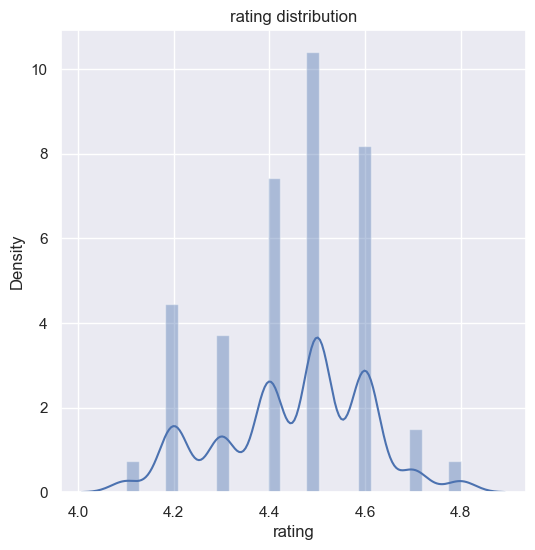

In [53]:
#checking the distibution of the  ratings
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['rating'])
plt.title('rating distribution')
plt.show()

Also in the following distplot we will look at the distribution of the total reviews column  and how my data is distributed and we can see that our data in this column is left skewed

C:\Users\stilinski\AppData\Local\Temp\ipykernel_7700\1451262028.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total reviews'])


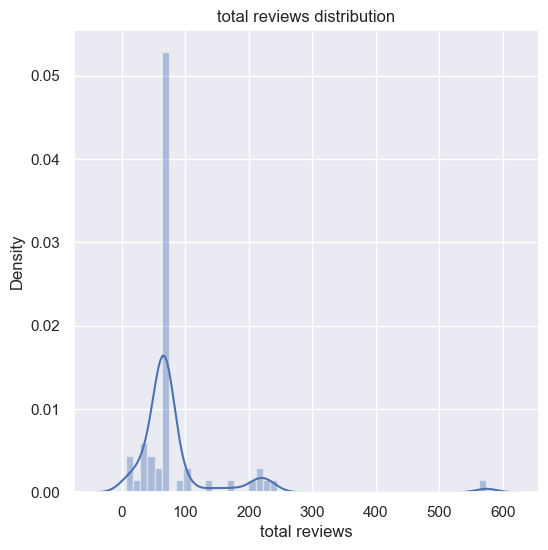

In [54]:
#checking the distibution of the  total reviews column
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['total reviews'])
plt.title('total reviews distribution')
plt.show()

In the  following column we will look at the distribution of the price and we can see that our data is not skewed into any direction athough most of our books range from 0-400 shillings

C:\Users\stilinski\AppData\Local\Temp\ipykernel_7700\2883149085.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


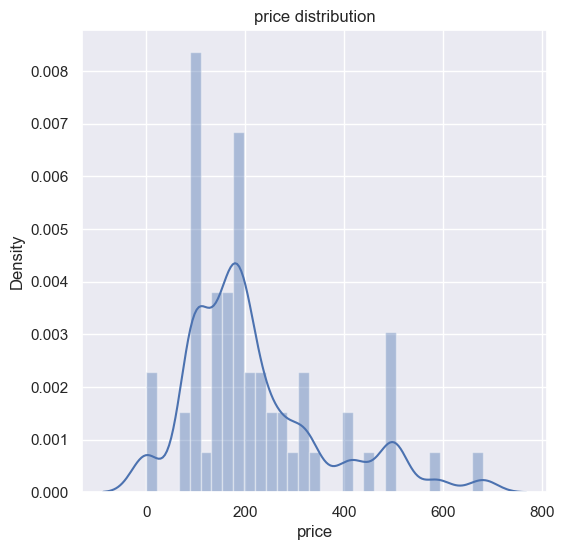

In [55]:
#checking the distibution of the  price distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['price'])
plt.title('price distribution')
plt.show()

In the following we will be plotting a heatmap to look at the correlation of our different columns

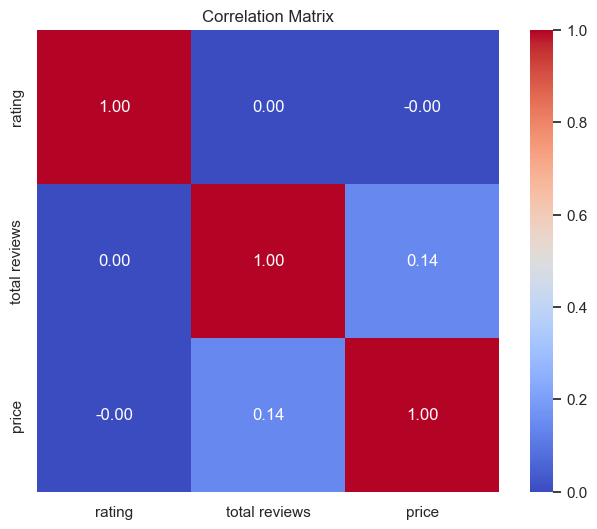

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns you want to include in the correlation matrix
columns_to_correlate = ['rating', 'total reviews', 'price']

# Create a subset DataFrame with only the selected columns
subset_df = df[columns_to_correlate]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # You can adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()







We can see that our total reviews is related to the price column  and this is ideally always the case  a books that has been reviewd by many people means has been read by many people thus its price will likely be higher , the other columns have no correlation and  we can see that the rating of a book is not directly mean a higher price of a book

In [15]:
# Save the cleaned data to 'cleaned.csv'
df.to_csv('cleaned.csv', index=False)

Since this is  and end to end project we will be taking this data that we have  already cleaned and now create a cleaned.csv this is the data we will add to sql   and visualize it in tableau